In [1]:
using Revise

In [7]:
push!(LOAD_PATH, "/home/amir/work/mps/src/")

using KrylovKit
using SparseArrays
using LinearAlgebra
using Plots
using LaTeXStrings

using MatrixProductStateTools
using ExactDiagonalizationTools
using SymTensors
using GaussianFermions
using GutzwillerMPS

In [3]:
include("/home/amir/work/mps/test/runtests.jl")

Test Summary: | Pass  Total
 MPS stuff    |    8      8
Test Summary: | Pass  Total
apply twosite |    2      2
Test Summary: | Pass  Total
fuse, defuse  |    1      1
Test Summary: | Pass  Total
contract      |    2      2


Test.DefaultTestSet("contract", Any[DefaultTestSet("simple", Any[], 1, false), DefaultTestSet("multi leg tensors", Any[], 1, false)], 0, false)

szvals = [-3.27516e-15, 2.44249e-15, -4.82947e-15, 4.05231e-15, -5.82867e-15, 5.71765e-15, -4.91274e-15, 6.66134e-15]
norm2(mps) = 0.9999999999999983


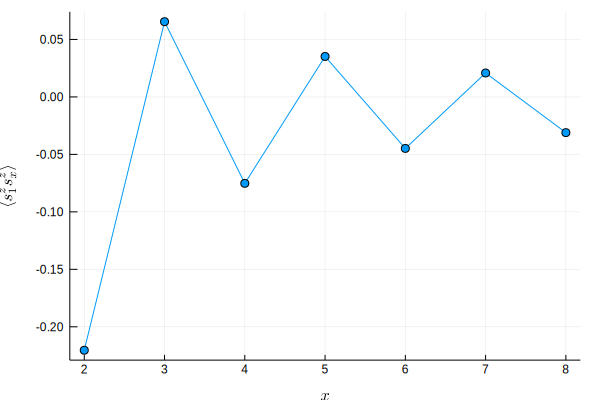

In [17]:
⊗ = kron
lx = 8
H = xxz_hamiltonian(lx)
es, vs = eigsolve(H, 1, :SR)
extended_sz(lx, l) = sparse(1.0I, 2^(l-1), 2^(l-1)) ⊗ [1.0 0; 0. -1.0] ⊗ sparse(1.0I, 2^(lx-l), 2^(lx-l))
mps = MatrixProductState(lx, 2, vs[1])
sz  = sz_half
szvals = [measure_1point(mps, sz, l) for l in 1:8]
@show szvals
@show norm2(mps)
data1 = measure_2point(mps, sz, sz) 
#data1[[half_measurement_index(lx,1,l+1) for l=1:lx-1]]
plot((2:lx), data1[[half_measurement_index(lx,1,l+1) for l=1:lx-1]], 
    marker=(:circle),xaxis=(L"$x$"), yaxis=(L"$\langle s^z_1 s^z_x\rangle$"), legend=false)

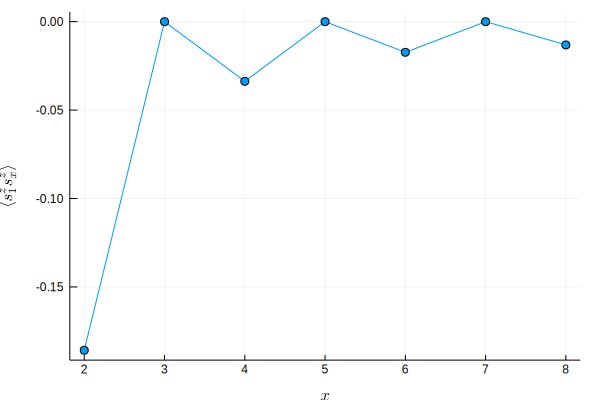

In [19]:
cm = correlationmatrix(hopping_chain(lx, boundary=:OBC), div(lx,2))
fgs = generate_fishmangates(cm)
mps = fishman2mps(fgs, 100)
data = measure_2point(mps, sz, sz) 
plot((2:lx), real.(data[[half_measurement_index(lx,1,l+1) for l=1:lx-1]]),
    marker=(:circle),xaxis=(L"$x$"), yaxis=(L"$\langle s^z_1 s^z_x\rangle$"), legend=false)

In [20]:
mpsgutz = zipandgutzwiller!(mps, mps);

mps_dims_are_consistent(mpsgutz) = true
norm2(mpsgutz) = 0.03300754458161876


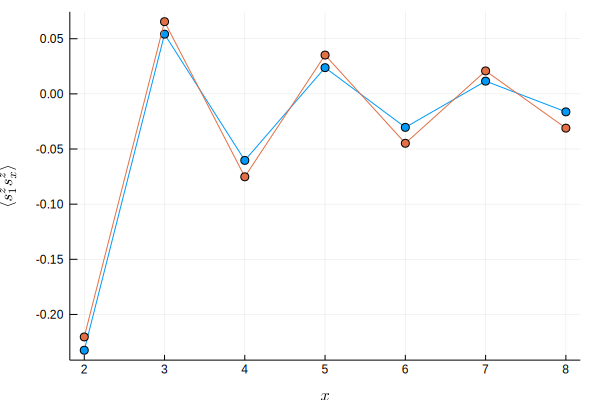

In [22]:
@show mps_dims_are_consistent(mpsgutz)
data = measure_2point(mpsgutz, sz, sz) 
data = real.(data ./ norm2(mpsgutz))
@show norm2(mpsgutz)
p = plot(xaxis=(L"$x$"), yaxis=(L"$\langle s^z_1 s^z_x\rangle$"), legend=false)
plot!(p, [2:lx], data[[half_measurement_index(lx,1,l+1) for l=1:lx-1]], marker=(:circle))
plot!(p, [2:lx], data1[[half_measurement_index(lx,1,l+1) for l=1:lx-1]], marker=(:circle))

szvals = [1.16573e-15, -9.71445e-16, 8.32572e-16, -1.15743e-15, -6.57861e-16, -1.81571e-16, -1.13798e-15, 1.85962e-15]


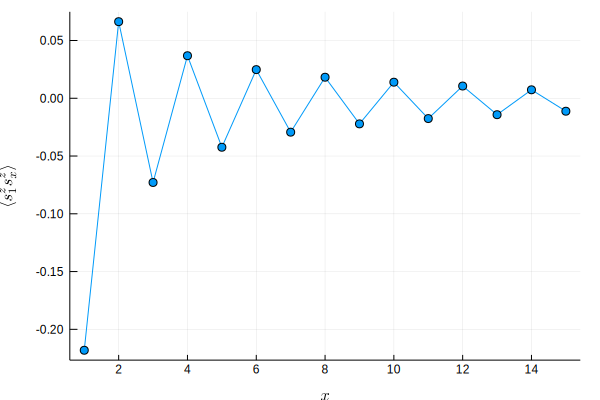

In [23]:
# ok perfect! Now we do this using symmetric tensors
lx = 16
H, block_states = xxz_hamiltonian(lx, mode=:U1)
es, vs = eigsolve(H, 1, :SR)
symmps = SymMatrixProductState(lx, 2, vs[1])
sz = sz_half_U1sym
szvals = [measure_1point(symmps, sz, l) for l in 1:8]
@show szvals
#@show norm2(mps)
measure_1point(symmps, sz)
data1 = measure_2point(symmps, sz, sz)
p = plot(xaxis=(L"$x$"), yaxis=(L"$\langle s^z_1 s^z_x\rangle$"), legend=false)
plot!(p, data1[[half_measurement_index(lx,1,l+1) for l=1:lx-1]], marker=(:circle))

In [ ]:
lx=8
cm = correlationmatrix(hopping_chain(lx, boundary=:OBC), 4)
fgs = generate_fishmangates_sym(cm)
mps = fishman2symmps(fgs, 100)
data = measure_2point(mps, sym_sz, sym_sz) 
plot(data[[half_measurement_index(lx,1,l+1) for l=1:lx-1]])